<a href="https://colab.research.google.com/github/YoonyoungChoi/problem_set/blob/main/COM501_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Github link: https://github.com/YoonyoungChoi/problem_set/blob/main/COM501_Problem_Set2.ipynb
# Import packages 

import numpy as np
import matplotlib.pyplot as plt
import time
from itertools import repeat, product
%matplotlib inline

**Problem 1** The Simpson quadrature rule approximates a definite intergral as follows:
$I= \int_a^bf(x)dx \approx \frac{b-a}{6}[f(a)+4f(\frac{a+b}{2}+f(b))]=\hat{I}^S$\
1) Suppose the function $f$ satisfies all necessaries mathematical conditions, and the inverval $[a,b]$ is split up into $N$ subintervals with width $\delta =\frac{b-a}{N}$. The integral $I$ is the approximated as the sum of the Simpson approximations in each subinterval. Show that the error of the new approximation has order $O(N^{-4}$)\
2) You are given to implement a set of computer code that computes the Simpson rule for matching ReLU(6), based on $N$ subintervals where $N \in [0,100]$\
3) Roughly speaking, what is the rate of convergence of the absolute error of your Simpsons quadrature approximation? In other words, give a rough estimate of the value of $r$ such that $\left| \hat{I}^S_{N}-I \right| = O(N^{-r})$\
where $\hat{I}^S$ is the Simpson quadrature approximation based on $N$ subintervals

**Answer**\
1)Let $\mid f^{(4)}(x) \mid for\ a \le x \le b$,\
$\mid E_s \mid \le \frac{K(b-a)^5}{180n^4}$, $n=2$\
$\mid I- \hat{I}^S \mid \le \frac{1}{90} \left(\frac{b-a}{2}\right)^5$\
$\mid I- \hat{I}^S \mid \le \sum \limits_{n=1} ^ N\left| \int_{a(n-1)\delta}^{a+n\delta} f(x)dx-\hat{I}_n^S \right| \le \sum \limits_{n=1}^N \frac{1}{90} \left(\frac{\delta}{2} \right)^5 K=\frac{1}{90} \frac{\delta}{2}^4 (b-a)K=O(N^{-4})$\
Left, Right: $O(N^{-1})$\
Midpoint: $O(N^{-2})$\
Trapezoid: $O(N^{-2})$\
Simpson: $O(N^{-4})$


2) You are given to implement a set of computer code that computes the Simpson rule for matching ReLU(6), based on $N$ subintervals where $N \in [0,100]$

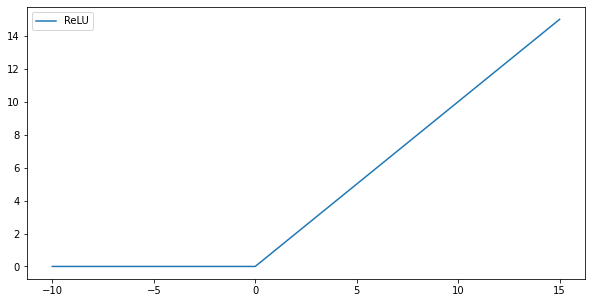

In [6]:
#Basic ReLU
x=np.linspace(-10, 15, 1000)
y=np.maximum(0,x)

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.legend(['ReLU'])
plt.show

#ReLU(6)
def ReLU6(x):
  y=np.maximum(0,x)
  y=np.minimum(y,6)
  return(y)

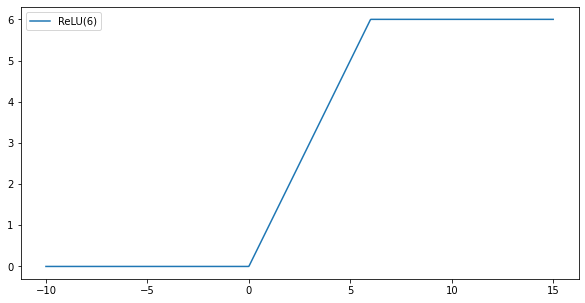

In [7]:
#ReLU(6)
x=np.linspace(-10, 15, 1000)
y=np.minimum(np.maximum(0,x),6)
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.legend(['ReLU(6)'])
plt.show()

3) Roughly speaking, what is the rate of convergence of the absolute error of your Simpsons quadrature approximation? In other words, give a rough estimate of the value of $r$ such that $\left| \hat{I}^S_{N}-I \right| = O(N^{-r})$

In [8]:
# Exact area = (6*6)/2 + 4*6= 42
def simpson(f,a,b,n):
  x=np.linspace(start=a, stop=b, num=2*n+1)
  delta=(b-a)/n
  func=np.vectorize(f)(x)

  s=delta*np.sum(func[0:-1:2]+4*func[1::2]+func[2::2])/6
  return np.sum(s)

In [9]:
a=0
b=10
n=100
result=[simpson(ReLU6, a, b, i) for i in range(1,1+n)]

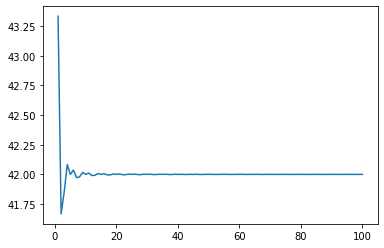

In [10]:
plt.plot(range(1,101),result)

In [12]:
error=42-np.array(result)

In [13]:
print(error)

[-1.33333333e+00  3.33333333e-01  1.48148148e-01 -8.33333333e-02
  0.00000000e+00 -3.70370370e-02  2.72108844e-02  2.08333333e-02
 -1.64609053e-02  0.00000000e+00 -1.10192837e-02  9.25925926e-03
  7.88954635e-03 -6.80272109e-03  0.00000000e+00 -5.20833333e-03
  4.61361015e-03  4.11522634e-03 -3.69344414e-03  0.00000000e+00
 -3.02343159e-03  2.75482094e-03  2.52047889e-03 -2.31481481e-03
  0.00000000e+00 -1.97238659e-03  1.82898948e-03  1.70068027e-03
 -1.58541419e-03  0.00000000e+00 -1.38744364e-03  1.30208333e-03
  1.22436486e-03 -1.15340254e-03  0.00000000e+00 -1.02880658e-03
  9.73946920e-04  9.23361034e-04 -8.76616261e-04  0.00000000e+00
 -7.93178663e-04  7.55857899e-04  7.21110510e-04 -6.88705234e-04
  0.00000000e+00 -6.30119723e-04  6.03591369e-04  5.78703704e-04
 -5.55324170e-04  0.00000000e+00 -5.12623350e-04  4.93096647e-04
  4.74664768e-04 -4.57247371e-04  0.00000000e+00 -4.25170068e-04
  4.10382682e-04  3.96353547e-04 -3.83031696e-04  0.00000000e+00
 -3.58326615e-04  3.46860

In [ ]:
# Error showed as 10^{-4}, same as 100^{-2} so r=2
# ReLU(6) is trapezoid form, doesn't need curve fitting
# Otherwise, for the measurement of triangle or quadrangel -> N^{-1} would be better

In [ ]:
# Quadrature measurement is differential and integral calculus
# Need to differentiate singular point
# The reason why we use Monte Carlo simulation

**Problem 2** Consider the following $M-$dimensional integral $I^M=\int_a^b \dots \int_a^b f(x_1, \dots, x_M)dx_1 \dots dx_M$\
We can compute an approximation of $I^M$ using the left-point quadrature rule for each inner intergral. In this sense, suppose that we divide up the integral $[a,b]$ into $N$ subintervals, and set $\Delta = \frac{b-a}{N}$. Define the $N-$dimensional left-point quadrature approximation as $\hat{I^N_{M}}=\sum\limits_{n_1=0}^{N-1} \ldots \sum\limits_{n_1=0}^{N-1}f(a+n_1\Delta, \ldots, a+n_M\Delta)\Delta^M$\
In this question, you can refer Fubini's theorem only as a reference point. You do not need the theorem for proof.\
1) Demonstrate that the absolute error of the $M-$dimensional left-point quadrature rule is of order $O(M \times N^{-1})$\
2) Discuss the number of basic operations required to compute $I_N^M$ is of order $O(N^M)$. For simplicity, assume that one evaluation of $f(a+n_1\Delta, \ldots, a+n_M\Delta)\Delta^M$ is one basic operation. You do not have to provide formal proof.\
3) We can define the computational efficiency of the $M-$dimensional left-point quadrature as the inverse of the product between its error and the computational budget it requires. Plot the order of the computational efficiency of the $M-$dimensional left-point quadrature approximation as a function of $M$ for $M \in [1,10]$ and $N=100$\
4) Do you believe that the $M-$dimensional left-point quadrature rule is the most computationally efficient approximation of the $M-$dimensional integral $I^M$? Argue why or why not.

Computational effort\
$\hat{I_N}=\sum \limits_{n=0}^{N-1} \Delta f(a+n\Delta)$
1. Compute $a+n\Delta$ for $n=0, \cdots, N-1$
2. Evaluate $f(a+n\Delta)$ for $n=0, \cdots, N-1$
3. Multiply $\Delta$ with $f(a+n\Delta)$ over $n=0, \cdots, N-1$
4. Sum up $f(a+n\Delta)$ over $n=0, \cdots, N-1$\
Computational Effort(Left-point):\
$CE(\hat{I_N})=O(N)$\
MSE:\
$MSE(\hat{I_N})=VAR(\hat{I_N})+Bias^2(\hat{I_N})=0+(\hat{I_N})^2=O(N^{-2})$
Computational efficiency:\
$\varepsilon(\hat{I_N})=\frac{1}{CE(\hat{I_N})\cdot MSE(\hat{I_N})}=\frac{1}{O(N) \cdot O(N^{-2})}=O(N)$\
Multidimensional quadrature\
$\varepsilon(\hat{I_N}^M)=\frac{1}{CE(\hat{I_N}^M)\cdot MSE(\hat{I_N}^M)}=\frac{1}{O(N^M) \cdot O(M^2 N^{-2})}=O(M^{-2}N^{2-M})$



1) Demonstrate that the absolute error of the $M-$dimensional left-point quadrature rule is of order $O(M \times N^{-1})$


In [ ]:
# Fubini's Therem: Integral of M-dimentional data, Mth integration of one-variable intregral
# MSE of each dimention: N^{-1} when using left-point quadrature
# For Mth dimension: M* N^{-1}
# MSE increased for multiple of M

2) Discuss the number of basic operations required to compute $I_N^M$ is of order $O(N^M)$. For simplicity, assume that one evaluation of $f(a+n_1\Delta, \ldots, a+n_M\Delta)\Delta^M$ is one basic operation. You do not have to provide formal proof.


In [ ]:
# Multi integration of M units -> for 1 unit of integration, N units of datapoints
# Complexity of calculus: N^{M}

3) We can define the computational efficiency of the $M-$dimensional left-point quadrature as the inverse of the product between its error and the computational budget it requires. Plot the order of the computational efficiency of the $M-$dimensional left-point quadrature approximation as a function of $M$ for $M \in [1,10]$ and $N=100$

In [14]:
def multi_integration(a,b,m,n=100):
  delta = (b-a)/n
  pair = list(range(n))
  pair = list(repeat(pair,m))
  pair = list(product(*pair))

  result=0
  for i in pair:
    x = list(np.zeros(m))
    for k in range(len(i)):
      x[k] = a + delta * i[k]
    result += np.sum(x) * (delta ** m)
  return result

time: 0.0019173622131347656
time: 0.18193626403808594
time: 11.94697642326355


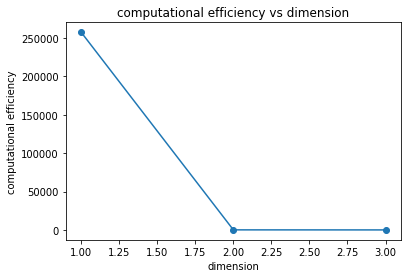

In [20]:
# 3 dimension calculation

error = list()
ce = list()

true_value = [1.5,9,40.5,162,1215/2,2187,15309/2,26244,177147/2,295245]

for i in range(1,4):
  abs_error=0
  start = time.time()
  approx = multi_integration(-1,2,i)
  last = time.time()
  print("time:", last-start)
  error = true_value[i-1] - approx
  ce.append(1/((error**2)*(last-start)))

m = list(range(1,4))
plt.plot(m, ce, marker = "o")
plt.xlabel("dimension")
plt.ylabel("computational efficiency")
plt.title("computational efficiency vs dimension")
plt.show()

4) Do you believe that the $M-$dimensional left-point quadrature rule is the most computationally efficient approximation of the $M-$dimensional integral $I^M$? Argue why or why not.

In [ ]:
# Error increased in M multiple times - affordable
# Calcultation time incereasd in exponentially
# Curse of Dimensionality
# This is the reason why we use Monte-Carlo simulation